In [4]:
import json


with open("../../hackathon/comm_disambiguated_cvis_count.json") as open_f:
    doi_to_cziW_id_lut = json.load(open_f)

with open("enduser_doi_to_czi.json") as f:
    enduser_doi_to_czi = json.load(f)

In [15]:
import pandas as pd
pypi_with_mentions = pd.read_json("../../hackathon/pypi_with_mentions.ndjson", lines=True)


In [68]:
czi_to_name_map = {}
for i, row in pypi_with_mentions.iterrows():
    name = row["name"]
    if name == "sklearn":
        name = "scikit-learn"
    czi_to_name_map[row["czi_id"]] = name


In [69]:
pypi_ids = set(pypi_with_mentions["czi_id"])

In [70]:
filtered_doi_to_cziW_id_lut = {
    doi: set(packages) & pypi_ids for doi, packages in doi_to_cziW_id_lut.items()
    if doi in enduser_doi_to_czi
}

In [71]:
def map_czi_name(iterable):
    return {czi_to_name_map.get(x) or x for x in iterable}

result = []

for doi, packages in enduser_doi_to_czi.items():
    filtered_set = map_czi_name(filtered_doi_to_cziW_id_lut.get(doi, set()))
    enduser_set = map_czi_name(packages)
    in_both = list(filtered_set & enduser_set)
    only_enduser = list(enduser_set - filtered_set)
    only_paper = list(filtered_set - enduser_set)
    
    result.append({
        'doi': doi,
        'both': in_both,
        'both_count': len(in_both),
        'enduser': only_enduser,
        'enduser_count': len(only_enduser),
        'paper': only_paper,
        'paper_count': len(only_paper),
    })



In [72]:
import pandas as pd
df = pd.DataFrame.from_records(result)

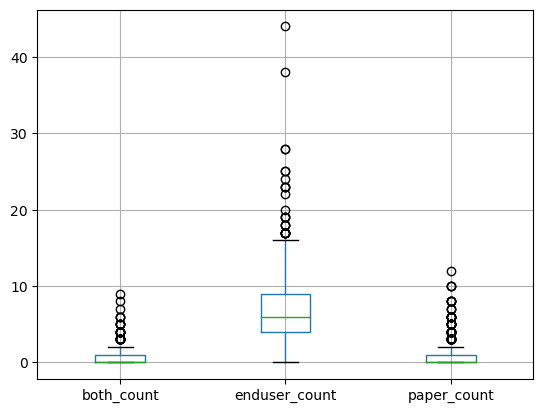

In [73]:
import matplotlib.pyplot as plt
df[["both_count", "enduser_count", "paper_count"]].boxplot()
plt.show()

In [74]:
df

,doi,both,both_count,enduser,enduser_count,paper,paper_count
0,10.15252/msb.20199235,[],0,[cobra],1,[],0
1,10.1021/acs.jcim.1c00428,[],0,[numpy],1,"[sphinx, pmx]",2
2,10.1186/s40462-021-00268-4,[],0,"[hvplot, movingpandas, osgeo, pandas, virescli...",16,[swarm],1
3,10.1093/hmg/ddaa212,[],0,"[pandas, numpy, ipython, upsetplot, matplotlib...",6,[],0
4,10.1093/bioinformatics/btaa578,"[numpy, scikit-learn]",2,"[autoreload, scipy, statsmodels, pandas, funct...",8,[aggrescan3d],1
...,...,...,...,...,...,...,...
704,10.7554/eLife.59099,[],0,"[numpy, matplotlib, scipy, scikit-image]",4,[],0
705,10.7554/eLife.54082,[],0,"[numpy, networkx, requests, seaborn, scipy, pa...",10,[],0
706,10.1371/journal.pcbi.1006333,[],0,"[autoreload, bunch, pandas, numpy, palettable,...",7,[],0
707,10.1107/S2052252520008830,[],0,"[xgboost, numpy, scikit-learn, h5py, matplotli...",6,[],0


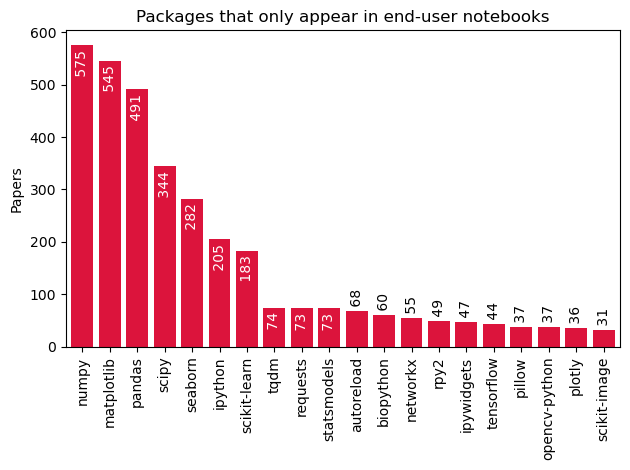

In [88]:
from collections import Counter

def plot_count(column, title):
    tf = column.apply(Counter).sum()
    y = [count for tag, count in tf.most_common(20)]
    x = [tag for tag, count in tf.most_common(20)]

    plt.bar(x, y, color='crimson')
    plt.xticks(rotation=90)
    plt.title(title)
    plt.ylabel("Papers")
    for i, (tag, count) in enumerate(tf.most_common(20)):
        plt.text(i, count, f' {count} ', rotation=90,
                ha='center', va='top' if i < 10 else 'bottom', color='white' if i < 10 else 'black')
    plt.xlim(-0.6, len(x)-0.4) # optionally set tighter x lims
    plt.tight_layout() # change the whitespace such that all labels fit nicely
    plt.show()

plot_count(df["enduser"], "Packages that only appear in end-user notebooks")

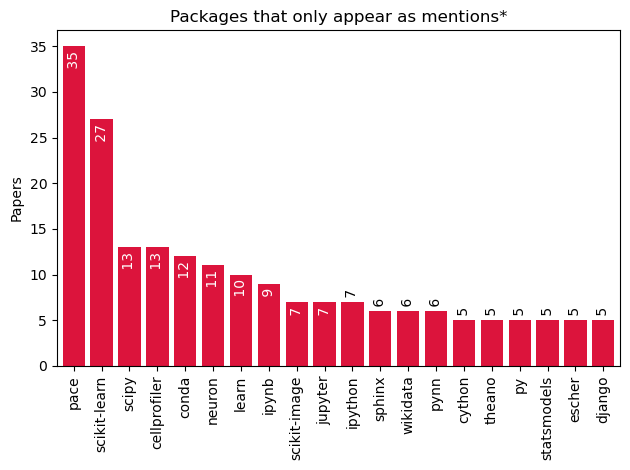

In [91]:
plot_count(df["paper"], "Packages that only appear as mentions*")

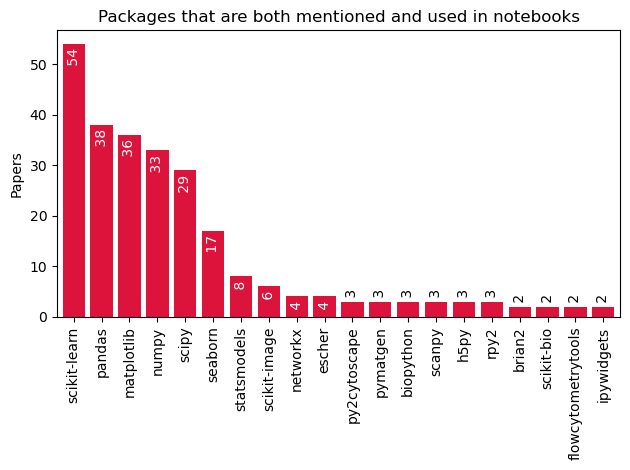

In [90]:
plot_count(df["both"], "Packages that are both mentioned and used in notebooks")

In [60]:
[k for k,v in czi_to_name_map.items() if 'sklearn' in v]

['SM124803', 'SM3414', 'SM1050847', 'SM969685']